# Introduction to supervised machine learning using regression methods
---

## Dataset:

$D=\{(\mathbf x_{1}, y_{1}), ..., (\mathbf x_{N}, y_{N})\}$,

where $y_{i}\epsilon \mathbb{R}$

## Goal of linear regression:
Find a trend line that represents correlation of independent input varaibles and the output

![Simple linear regression](resources/simple_regression.png)


Here the x's are our input data points, and the y's are the labels that we wisch to predict

## Univariate linear regression
---
Intuition: Try to fit a line that "best" represents the trend of our data(e.g. correlation)

$\hat{y_{i}} = b+w_{1}x_{i}$

$\hat{y_{i}}$: predicted value for data point $x_{i}$

$x_{i}$: independent variable/feature of training data point $i$

$b$: bias value (trainable)

$w_{1}$: weight value for feature x (trainable)

### Note: Bias and weight value stay the same for every data point

### Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn     
import matplotlib.pyplot as plt

In [6]:
# Generate a dataset

np.random.seed(0)

X = 2.5 * np.random.rand(100) + 1.5   
Y = 0.3 * X  #real Y

model = {'weight': 0.3}

res = 0.1 * np.random.randn(100)     #residue 
Y_observed = 0.3 * X + res 

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'experience': X,
     'income[thous.]': Y_observed}
)

# Show the first five rows of our dataframe
df.head()

,experience,income[thous.]
0,2.872034,0.745095
1,3.287973,1.076475
2,3.006908,0.948639
3,2.862208,0.705038
4,2.559137,0.916566


### Plot the data
---
### "True" underlying data distribution

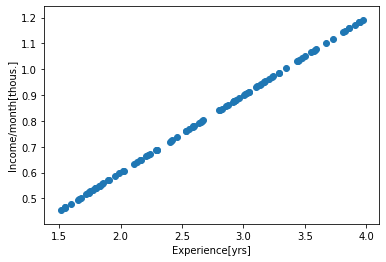

In [7]:
fig = plt.figure()
plt.scatter(X, Y)
plt.xlabel('Experience[yrs]')
plt.ylabel('Income/month[thous.]')
plt.show()

### Observed, noisy real world data

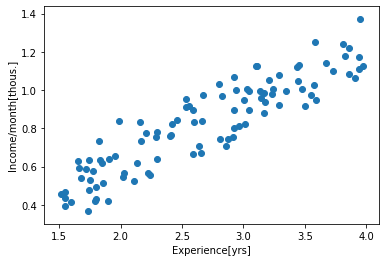

In [8]:
fig = plt.figure()
plt.scatter(X, Y_observed)
plt.xlabel('Experience[yrs]')
plt.ylabel('Income/month[thous.]')
plt.show()

## Does interpolation finds a good trend representation ?

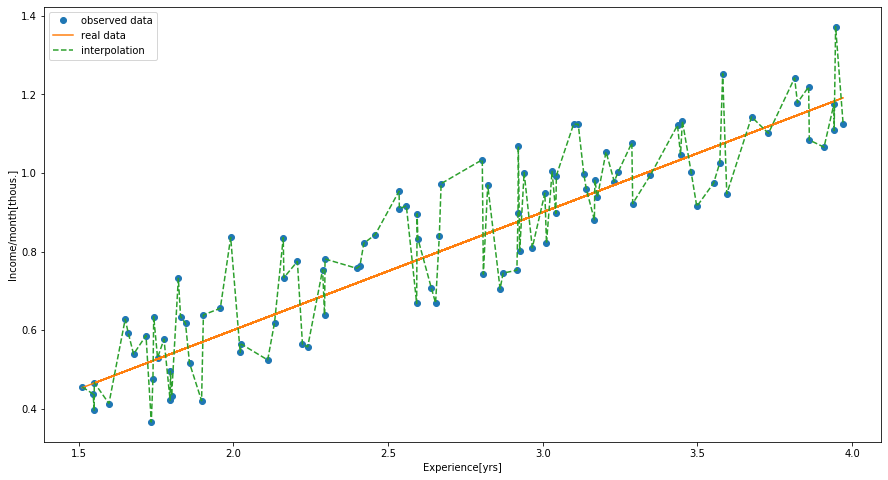

In [9]:
from scipy.interpolate import interp1d

f = interp1d(X[np.argsort(X)], Y_observed[np.argsort(X)], kind='cubic')

fig = plt.figure(figsize=(15,8))
plt.plot(X, Y_observed,'o', X, Y, X[np.argsort(X)], f(X[np.argsort(X)]), '--')

plt.xlabel('Experience[yrs]')
plt.ylabel('Income/month[thous.]')
plt.legend(['observed data', 'real data', 'interpolation'])

plt.show()

## As indicated in the plot above, linear interpolation does quite bad fitting that function, because how would we predict a new point ???

# How to measure the error wrt. our predictions and the real labels ?

## -> Residuals
A residual (or fitting deviation), is an observable estimate of the unobservable statistical error. - https://en.wikipedia.org/wiki/Errors_and_residuals

$res = \hat{y}-y$

where: 

$\hat{y}=w_{1}x$: predicted values

$y$: observed values

In [7]:
def residuals(X, model, Y_observed):
    return model['weight'] * X - Y_observed

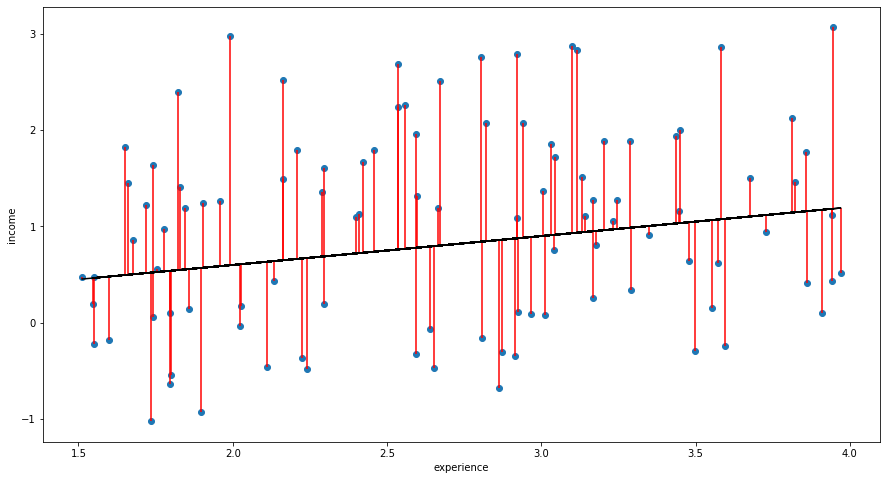

In [8]:
fig = plt.figure(figsize=(15,8))

plt.scatter(X, Y_observed)
plt.plot(X, Y, 'k')
plt.vlines(X, Y_observed, Y_observed+residuals(X, model, Y_observed), 'r')
plt.xlabel('experience')
plt.ylabel('income')

plt.show()

# First Loss funtion / error measure:
## Mean-squared error

$MSE_{scalar} = \frac{1}{2N} \sum_{n=1}^{N} ( wx - y )^{2} $

$MSE_{matrix} = \frac{1}{2N} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $

with:

$\mathbf{X}\epsilon \mathbb{R}^{Nx1}$, N: number of data points

$\mathbf{y}\epsilon \mathbb{R}^{Nx1}$

In [9]:
from sklearn.metrics import mean_squared_error

# Reformulating the task as an optimization problem

Let:

$MSE = \underset{w_{1}}{min} \ \frac{1}{2N} \sum_{n=1}^{N} ( \hat{y} - y )^{2} $

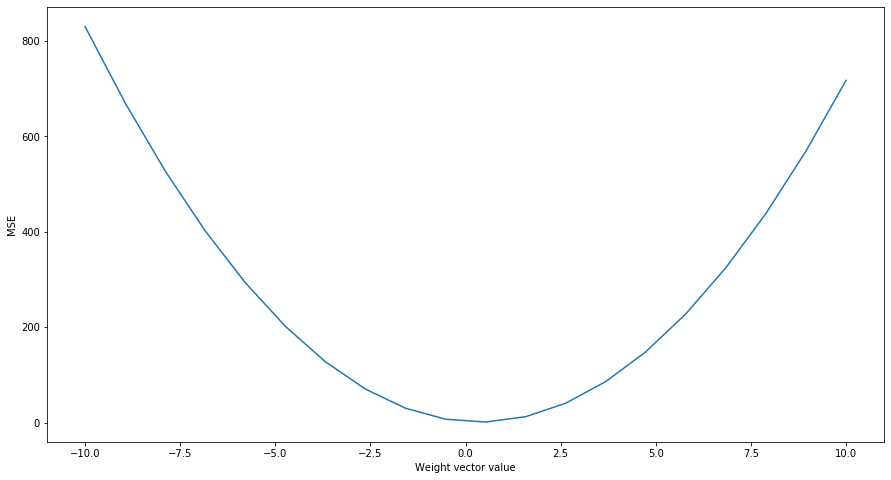

In [10]:
w_s = np.linspace(-10, 10, 20)

mse_losses = []
for w in w_s:
    model = {
        'weight': w
    }
    
    Y_pred = w*X
    mse_losses.append(mean_squared_error(Y_observed, Y_pred))
    
fig = plt.figure(figsize=(15,8))

plt.plot(w_s, mse_losses)
plt.xlabel('Weight vector value')
plt.ylabel('MSE')
plt.show()

# Convex optimization problem -> there exists a global optimum

## Mathematical optimization problem formulation:

$\underset{w_{1}}{min}\ MSE = \underset{w_{1}}{min} \ \frac{1}{2n} \sum_{n=1}^{N} ( w_{1}x_{i} - y)^{2} = \underset{w_{1}}{min} \ \frac{1}{2N} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $

## 1. Approach: Closed-form solution (Rarely possible !)

In order to minimize set: $\nabla_{w_{1}} MSE = 0$ and solve for $w_{1}$

$\nabla_{w_{1}} MSE = w_{1}\mathbf{X^{T}X} - \mathbf{X^{T}y} = 0$

$\Rightarrow w_{1}=\mathbf{X}^{T}\mathbf{y}(\mathbf{X}^{T}\mathbf{X})^{-1}$

In [10]:
w_opt = np.dot(X.T, Y_observed)/(np.dot(X.T,X))
print(f'Optimial weight value: {w_opt}')

Optimial weight value: 0.36518397181749696


### Plotting results

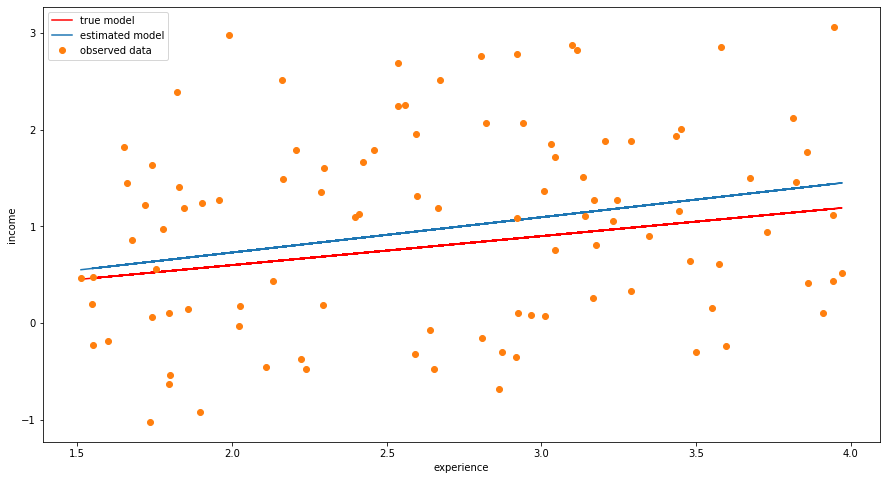

In [11]:
fig = plt.figure(figsize=(15,8))

plt.plot(X, Y,'r', X, w_opt*X, X, Y_observed, 'o')
plt.legend(['true model', 'estimated model', 'observed data'])
plt.xlabel('experience')
plt.ylabel('income')

plt.show()

# 2. Approach: Gradient Descent - Very important optimization algorithm

<img src="resources/negative_gradient.svg"  />
<img src="resources/negative_gradient2.svg"  />

## How it works

1. Randomly initialize $w_{1}$
2. Repeat until convergence: $w^{t+1}_{1} \leftarrow w^{t}_{1} - \alpha \nabla_{w^{t}_{1}}J(w_{1}^{t})$, 
where $\alpha$= learning rate and $J(w_{1})=MSE$

## NOTE:
- $\nabla_{w} J(w)$ is the vector of greatest increase of $J(w)$, when starting from point $w$.
- $-\nabla_{w} J(w)$ is the vector of greatest increase of $J(w)$, when starting from point $w$


# NOTE: Usually loss functions are NON-convex, meaning that there doesn't exist a closed form solution

<img src="resources/grad_descent.png"  />

## Impact of learning rate on the optimization performance
The learning rate $\alpha$, also often called "step size", determines how big of your update steps will be in the direction of the current gradient. 

Important facts about the learning rate:
---
1. Smaller learning rates will converge slower to a optimum
2. Larger learning rates might overshoot the optimum and thus never converge towards an optimum
3. The learning rate is a hyperparameter(not learnable, thus needs to be decided by the user)


### -> Jump to Google Viz.:

https://developers.google.com/machine-learning/crash-course/reducing-loss/learning-rate

In [10]:
#-----------------------------------------------------------------------------------#

# Back to linear regression... how do we evaluate the goodness of our trained model ?


### Workflow
- Load Salary data
- do train/test split
- fit linear regressor on training data
- predict test data

### Linear regression evaluation
1. Approach: Visual comparison
2. Approach: MSE comparison

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
data = pd.read_csv('data/Salary_Data.csv')

In [19]:
data.iloc[0:5]

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
train_data = data.iloc[:int(data.shape[0]*0.8)]
test_data = data.iloc[int(data.shape[0]*0.8):]

In [23]:
x_train = train_data.iloc[:,0].as_matrix().reshape(-1,1) 
#-1是指这个dimension不管，另一个deminsion固定
#ilocs是
y_train = train_data.iloc[:,1].as_matrix().reshape(-1,1)

x_test = test_data.iloc[:,0].as_matrix().reshape(-1,1)
y_test = test_data.iloc[:,1].as_matrix().reshape(-1,1)

/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [32]:
model = LinearRegression()

In [33]:
trained_model = model.fit(x_train, y_train)

In [47]:
train_predictions = trained_model.predict(x_train)
test_predictions = trained_model.predict(x_test)

## 1. Approach: Visual comparison

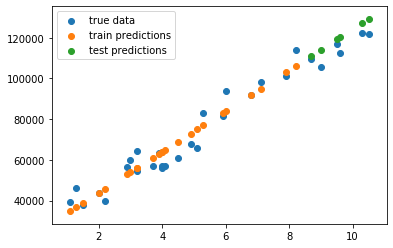

In [48]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.scatter(x_train, train_predictions)
plt.scatter(x_test, test_predictions)
plt.legend(['true data', 'train predictions', 'test predictions'])

plt.show()

## 2. Approach: Train & Test residual and MSE comparison

In [66]:
train_residuals = y_train - train_predictions
summed_train_residuals = np.sum(train_residuals)
print(summed_train_residuals)

test_residuals = y_test - test_predictions
summed_test_residuals = np.sum(test_residuals)
print(summed_test_residuals)

6.548361852765083e-11
-32119.57528371013


In [67]:
print(mean_squared_error(y_train, train_predictions))
print(mean_squared_error(y_test, test_predictions))

35116249.80808982
35766738.23965806


### Train residuals are almost zero -> cool
They should actually reach zero if our test set size grows
### MSE is almost the same -> no overfitting -> cool

# Key takeaways:
---

## 1. Define a model that represents the trend
## 2. Define an error measure/loss function
## 3. Use mathematical optimization(e.g. Gradient Descent) to minimize the loss
## 4. Split data into train and test set to be able to evaluate your model's generalization performance on unseen data